# 导入模块

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper",font_scale = 2.0)
# plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

# 获取数据

In [4]:
titanic=sns.load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

# 查看有无缺失值

In [52]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [53]:
df = titanic

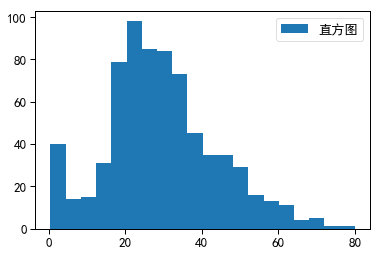

In [54]:
df = titanic
# 删除含有缺失年龄的观察
df.dropna(subset=['age'], inplace=True)
# 绘图：乘客年龄的频数直方图,绘图数据,指定直方图的条形数为20个
plt.hist(df["age"],bins = 20,label = '直方图' )
# 显示图例
plt.legend()

# 用年龄的均值进行缺失值的填充，再进行年龄分布的可视化；

In [55]:
mean =titanic['age'] .mean() 
print(mean)
#用均值进行缺失值的填充
titanic['age'] = titanic['age'].fillna(mean)
titanic.isnull().sum()

29.69911764705882


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

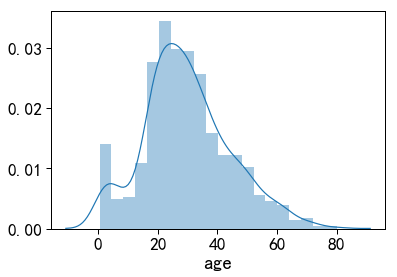

In [68]:
sns.distplot(titanic["age"]) 

# 4)	显示登船地点（S，C，Q）的人数；

In [57]:
titanic['embarked'].value_counts()


S    554
C    130
Q     28
Name: embarked, dtype: int64

# 5)	对登船地点进行缺失值的填充（填充为S）；

In [58]:
titanic['embarked'].isnull().sum()

2

In [59]:
titanic['embarked'] = titanic['embarked'].fillna("S")
titanic['embarked'].isnull().sum()

0

# 6)	对于deck字段，由于缺失值太多，将其删除；

In [60]:
del titanic['deck']
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True

In [56]:
# 方法一：直接del DF['column-name']
# 方法二：采用drop方法，有下面三种等价的表达式：
# 1. DF= DF.drop('column_name', 1)；

# 数据探索

## 1)	可视化乘客的性别分布；

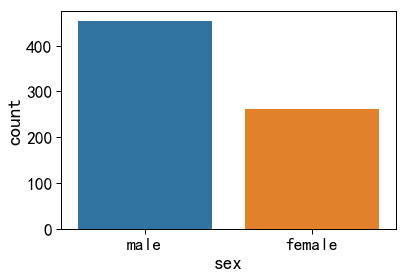

In [69]:
sns.countplot(x="sex",data=titanic)

## 2)	基于性别，绘制乘客年龄分布箱线图；

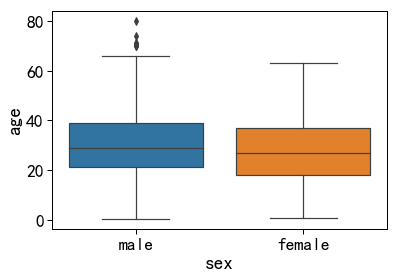

In [70]:
sns.boxplot(x="sex", y="age",data=titanic)

# 3)	对船舱等级进行计数

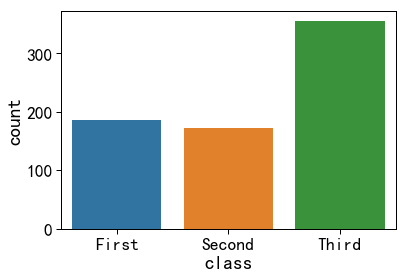

In [71]:
sns.countplot(x="class",data=titanic)

# 4)	结合船舱等级，绘制乘客年龄分布，绘制乘客年龄分布的琴图

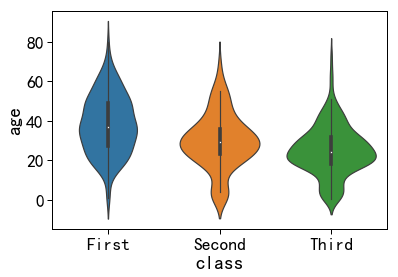

In [72]:
sns.violinplot(y='age',x = 'class', data = titanic)

# 5)	对alone进行计数

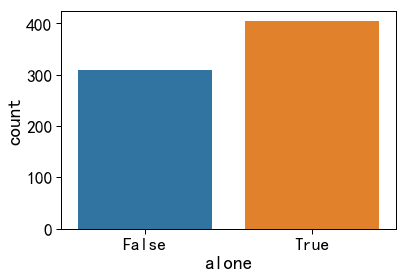

In [73]:
sns.countplot(x='alone',data=titanic)

#  6)	对年龄进行分级，分开小孩和老人的数据；

In [85]:
def agelevel(age):
    if age<=16:
        return 'child'
    elif age>=60:
        return 'old'
    else:
        return 'middle'
titanic['age_level']=titanic['age'].map(agelevel)
titanic.head() 


survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone age_level  
0    man        True  Southampton    no  False    middle  
1  woman       False    Cherbourg   yes  False    middle  
2  woman       False  Southampton   yes   True    middle  
3  woman       False  Southampton   yes  False    middle  
4    man        True  Southampton    no   True    middle

# 对分级后的年龄可视化；

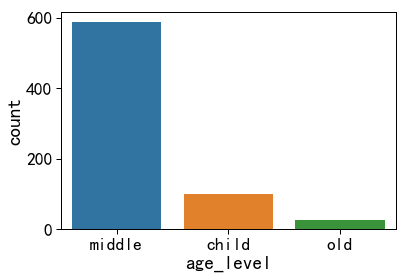

In [86]:
sns.countplot(x='age_level',data=titanic)


# 分析乘客年龄与生还乘客之间的关系；

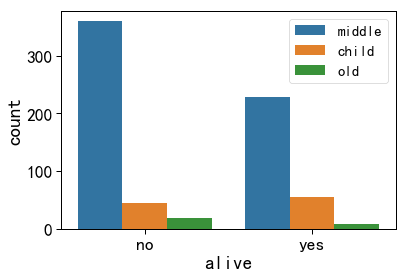

In [87]:
sns.countplot(x='alive',hue='age_level',data=titanic)
plt.legend(loc = "best",fontsize='15')